# Lab 2: Data Preprocessing


In this assignment, we will learn how to explore the raw data and preprocess it.

The dataset we are going to exlore is an insurance data. It provides different features of each user as follows:

- age: age of the user
- sex: gender of the user
- bmi: body mass index, providing an understanding of body
- children: number of children covered by health insurance / number of dependents
- smoker: smoker or not
- region: the user's residential area in the US, northeast, southeast, southwest, northwest.

Additionally, the medical cost of each user is also provided:

- charges: the medical cost

Please follow Lecture 5_data_understanding and Lecture 6_data_preprocessing to complete following questions.


### Q1. Load data with Pandas and output the basic information of this dataset, such as the features and their data types. Which features are numerical features and which users are categorical features?


In [38]:
# your code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('insurance.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Q2. Check whether there are missing values in this dataset.


In [39]:
# your code
df.isnull().any()


age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

### Q3. Visualize all numerical features with histogram plot to see the distribution of each numerical feature.


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

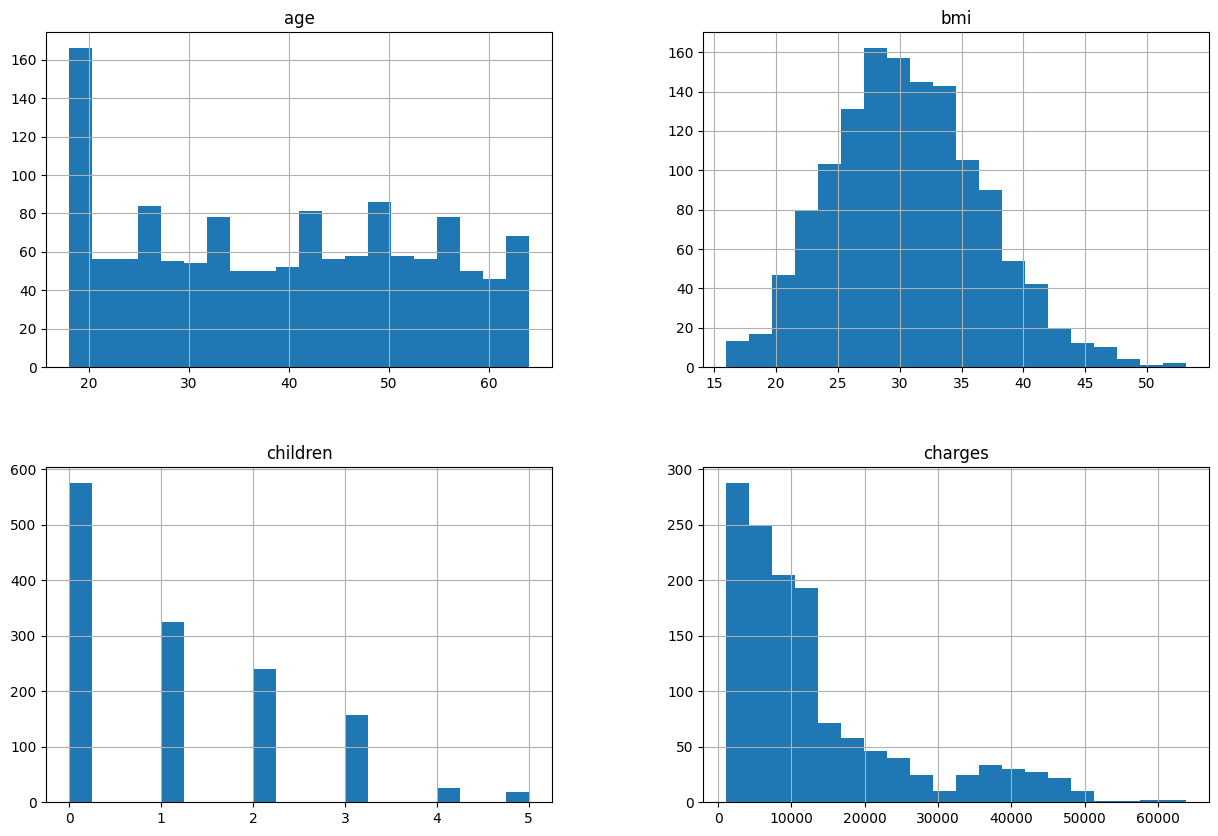

In [40]:
# your code
df.hist(figsize=(15, 10), bins=20)


### Q4. Use corr() function of Pandas to show the correlation between different numerical features


In [41]:
# your code
df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Q5. For all categorical features, use bar plot to visualize the number of users within each category.


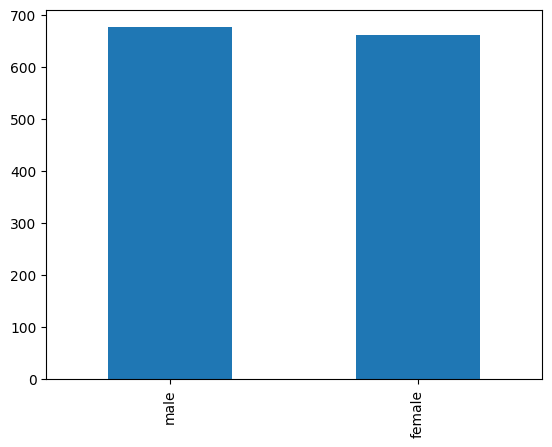

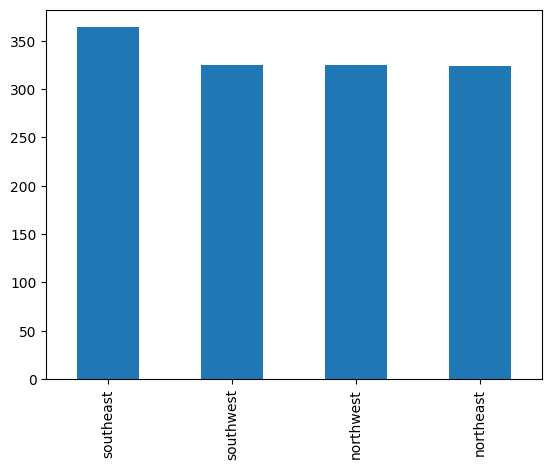

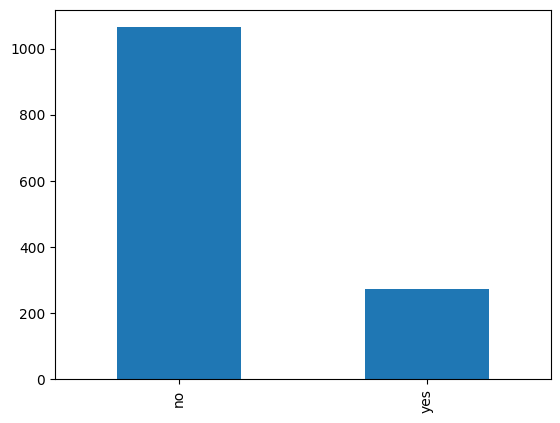

In [42]:
# your code
import matplotlib.pyplot as plt
df['sex'].value_counts().plot(kind="bar")
plt.show()
df['region'].value_counts().plot(kind="bar")
plt.show()
df['smoker'].value_counts().plot(kind="bar")
plt.show()


### Q6. Convert all categorical features into numerical features with Label Encoding or One-Hot Encoding


In [43]:
# your code
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['sex'] = encoder.fit_transform(df['sex'])
print(df['sex'].value_counts)
df['smoker'] = encoder.fit_transform(df['smoker'])
print(df['smoker'].value_counts)
df['region'] = encoder.fit_transform(df['region'])
print(df['region'].value_counts)


<bound method IndexOpsMixin.value_counts of 0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Name: region, Length: 1338, dtype: int64>


### Q7. Normalize all numerical features


In [44]:
# your code
from sklearn.preprocessing import OneHotEncoder
np.set_printoptions(precision=4)
x_array = df._get_numeric_data().values.astype(dtype=np.float32)
print('Original Data')
print(x_array)
x_array_mean = np.mean(x_array, axis=0)
x_array_std = np.std(x_array, axis=0)
print('Mean and Std of age')
print(x_array_mean)
print(x_array_std)
x_array = (x_array-x_array_mean)/x_array_std
print('Normalized age')
print(x_array)


Original Data
[[1.9000e+01 0.0000e+00 2.7900e+01 ... 1.0000e+00 3.0000e+00 1.6885e+04]
 [1.8000e+01 1.0000e+00 3.3770e+01 ... 0.0000e+00 2.0000e+00 1.7256e+03]
 [2.8000e+01 1.0000e+00 3.3000e+01 ... 0.0000e+00 2.0000e+00 4.4495e+03]
 ...
 [1.8000e+01 0.0000e+00 3.6850e+01 ... 0.0000e+00 2.0000e+00 1.6298e+03]
 [2.1000e+01 0.0000e+00 2.5800e+01 ... 0.0000e+00 3.0000e+00 2.0079e+03]
 [6.1000e+01 0.0000e+00 2.9070e+01 ... 1.0000e+00 1.0000e+00 2.9141e+04]]
Mean and Std of age
[3.9207e+01 5.0523e-01 3.0663e+01 1.0949e+00 2.0478e-01 1.5157e+00
 1.3270e+04]
[1.4045e+01 4.9997e-01 6.0959e+00 1.2050e+00 4.0354e-01 1.1045e+00
 1.2105e+04]
Normalized age
[[-1.4388 -1.0105 -0.4533 ...  1.9706  1.3439  0.2986]
 [-1.51    0.9896  0.5096 ... -0.5075  0.4385 -0.9537]
 [-0.798   0.9896  0.3833 ... -0.5075  0.4385 -0.7287]
 ...
 [-1.51   -1.0105  1.0149 ... -0.5075  0.4385 -0.9616]
 [-1.2964 -1.0105 -0.7978 ... -0.5075  1.3439 -0.9304]
 [ 1.5517 -1.0105 -0.2614 ...  1.9706 -0.4669  1.3111]]


### Q8. Save your preprocessed data into a csv file. Submit your code and the preprocessed data.


In [45]:
df.to_csv('newfile.csv',index=False)